# Graphical copula validation

In this example we are going to visualize an estimated copula versus the data in the rank space.

In [6]:
from __future__ import print_function
import openturns as ot

In [7]:
# Create data
marginals = [ot.Normal()] * 2
dist = ot.ComposedDistribution(marginals, ot.ClaytonCopula(3))
N = 500
sample = dist.getSample(N)

In [8]:
# The estimated copula
estimated = ot.ClaytonCopulaFactory().build(sample)

In [9]:
# Cloud in the rank space
ranksTransf = ot.MarginalTransformationEvaluation(marginals, ot.MarginalTransformationEvaluation.FROM)
rankSample = ranksTransf(sample)
rankCloud = ot.Cloud(rankSample, 'blue', 'plus', 'sample')

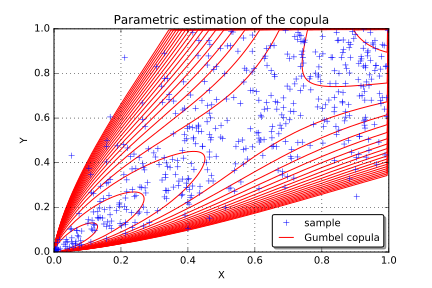

In [10]:
# Graph with rank sample and estimated copula
myGraph = ot.Graph('Parametric estimation of the copula', 'X', 'Y', True, 'topleft')
myGraph.setLegendPosition('bottomright')
myGraph.add(rankCloud)

# Then draw the iso-curves of the estimated copula
minPoint = [0.0]*2
maxPoint = [1.0]*2
pointNumber = [201]*2
graphCop = estimated.drawPDF(minPoint, maxPoint, pointNumber)
contour_estCop = graphCop.getDrawable(0)

# Erase the labels of the iso-curves
contour_estCop.setDrawLabels(False)

# Change the levels of the iso-curves
nlev = 21
levels = ot.Point(nlev)
for i in range(nlev):
    levels[i] = 0.25 * nlev / (nlev - i)
contour_estCop.setLevels(levels)
# Change the legend of the curves
contour_estCop.setLegend('Gumbel copula')

# Change the color of the iso-curves
contour_estCop.setColor('red')

# Add the iso-curves graph into the cloud one
myGraph.add(contour_estCop)
myGraph